In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
%matplotlib notebook

plt.rcParams['figure.figsize'] = (6,6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 7})
cmap=plt.cm.get_cmap("Spectral")

<IPython.core.display.Javascript object>


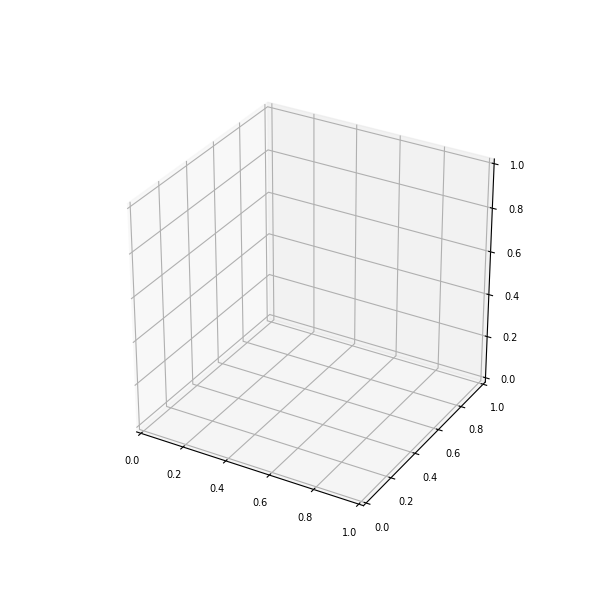

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

In [4]:
import quandl
import pandas as pd
quandl.ApiConfig.api_key = 'YOUR KEY HERE'
def get_data(code_list):
    all_data=[]
    for each_code in code_list: 
        ary=quandl.get(f'ZILLOW/{each_code}', returns='numpy')
#         all_data[each_code]=ary
        one_df=pd.DataFrame(ary)
        one_df=one_df.rename({'Value': each_code}, axis=1)#, columns=['Date', each_code])
        one_df=one_df.set_index('Date')
        all_data.append(one_df)
    df=pd.concat(all_data, axis=1)
    return df

#Age of Inventory: Each Wednesday, age of inventory is calculated as the 
#median number of days all active listings as of that Wedne

df = get_data(['M9_MRPFAH', 'M9_MLPFAH', 'M9_MSPFAH'])
df = df.rename(columns={"M9_MRPFAH": "Median Rent Price Per Sqft", 
                        "M9_MLPFAH": "Median Listing Price Per Sqft",
                        "M9_MSPFAH": "Median Sold Price Per Sqft"})

drop_na_df = df.dropna()
drop_na_df.head()

,Median Rent Price Per Sqft,Median Listing Price Per Sqft,Median Sold Price Per Sqft
Date,,,
2010-01-31,0.727402,93.546798,83.6435
2010-02-28,0.716958,93.266667,80.8857
2010-03-31,0.716958,93.991737,78.0938
2010-04-30,0.722383,94.437564,79.9646
2010-05-31,0.722983,93.065811,82.2230


<IPython.core.display.Javascript object>


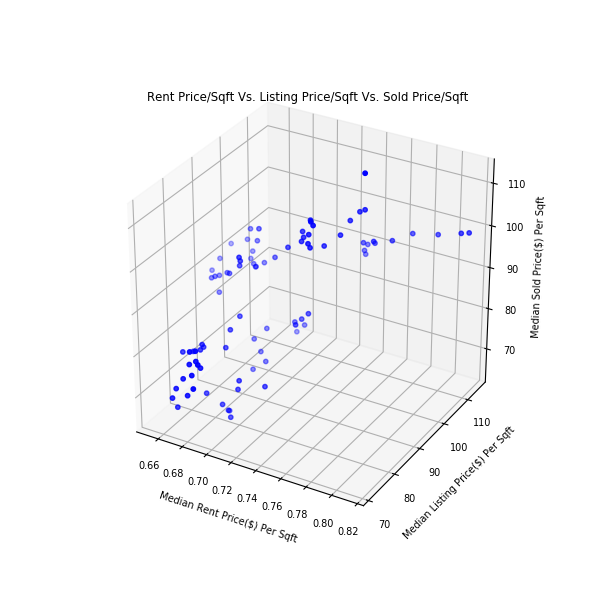

In [5]:
x = drop_na_df["Median Rent Price Per Sqft"].values.reshape(-1, 1)
y = drop_na_df["Median Listing Price Per Sqft"].values.reshape(-1, 1)
z = drop_na_df["Median Sold Price Per Sqft"].values.reshape(-1, 1)

#print("Shape: ", x.shape, y.shape, z.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Rent Price/Sqft Vs. Listing Price/Sqft Vs. Sold Price/Sqft')
ax.set_xlabel('Median Rent Price($) Per Sqft')
ax.set_ylabel('Median Listing Price($) Per Sqft')
ax.set_zlabel('Median Sold Price($) Per Sqft')

ax.scatter(x, y, z, s=10, c='b', marker='o')
plt.savefig('3DPlot-Sqft.png')

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fitting our model with all of our features in X
model.fit(x, y)

score = model.score(x, y)
print(f"R2 Score: {score}")

R2 Score: 0.5534702797669084


# This plot shows that when comparing all three, there is little correlation, with an R-squared score of 0.55347027.